In [1]:
# Using model scripts from classsroom scripts given by professor chase
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import numpy as np 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# specifying file name
file = '/Users/rahul/Downloads/birthweight_low.xlsx'


# reading the file into Python
birthweightlow = pd.read_excel(io=file)


# outputting the first ten rows of the dataset
birthweightlow.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
# finding the missig values in each column
birthweightlow.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [3]:
#filling the missing values for column in "meduc"
meduc_med = birthweightlow ['meduc'].median()
birthweightlow['meduc'].fillna(value = meduc_med,
                       inplace = True)
#filling the missing values for column in "npvis"
npvis_med = birthweightlow ['npvis'].median()
birthweightlow['npvis'].fillna(value = npvis_med,
                       inplace = True)

#filling the missing values for column in "feduc"
feduc_med = birthweightlow['feduc'].median()
birthweightlow['feduc'].fillna(value = feduc_med,
                       inplace = True)

birthweightlow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


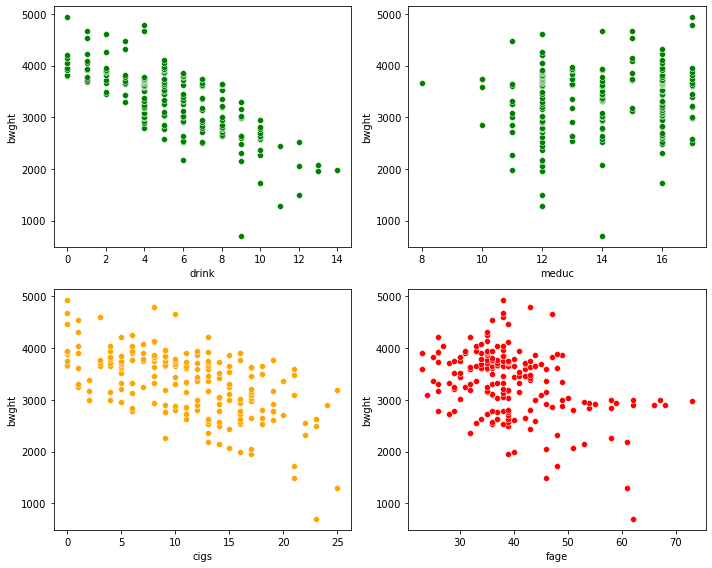

In [4]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweightlow['drink'],
                y = birthweightlow['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweightlow['meduc'],
                y = birthweightlow['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweightlow['cigs'],
                y = birthweightlow['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'cigs')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweightlow['fage'],
                y = birthweightlow['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'fage')
plt.ylabel(ylabel = 'bwght')



########################



# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

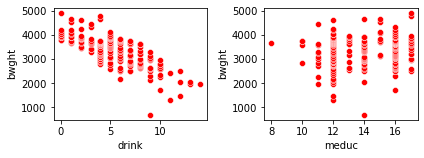

In [5]:
# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweightlow['drink'],
                y = birthweightlow['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'drink')
plt.ylabel(ylabel = 'bwght')



##################

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweightlow['meduc'],
                y = birthweightlow['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'meduc')
plt.ylabel(ylabel = 'bwght')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


In [6]:
#creating a continues data list 
continuous_data = [ 'bwght','mage',
'meduc',
'monpre',
'npvis' ,
'fage', 
'feduc',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth', 
'fwhte',
'fblck' ,
'foth']

# developing a correlation matrix based on continuous features
birthweightlow_corr = birthweightlow[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthweightlow_corr.loc[ : , continuous_data].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52
mblck,0.13,-0.02,-0.19,0.13,-0.09,-0.06,-0.13,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44
fblck,0.12,0.04,-0.23,0.03,-0.07,-0.03,-0.15,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48
male,0.11,-0.05,-0.03,-0.08,0.00,-0.09,0.08,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03
moth,-0.02,0.02,0.46,-0.21,0.06,0.03,0.52,0.17,-0.04,-0.03,-0.44,-0.57,1.00,-0.31,-0.50,0.83
fwhte,-0.04,-0.08,-0.18,0.04,0.03,-0.03,-0.36,-0.01,0.07,-0.03,0.84,-0.46,-0.31,1.00,-0.53,-0.49
monpre,-0.05,0.16,-0.23,1.00,-0.34,0.04,-0.29,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07


In [7]:
#birthweightlow['log_bwght'] = np.log(df1['bwght'])
birthweightlow['log_meduc'] = np.log(birthweightlow['meduc'])
birthweightlow['log_fage']   = np.log(birthweightlow['fage'])
birthweightlow['log_drink'] = np.log(birthweightlow['drink'])

#sum +0.0009 because there are variable 0
birthweightlow['log_drink']   = np.log(birthweightlow['drink'] + 0.00009)




/Users/rahul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
#retriving the columns
for column in birthweightlow:
    print(column +' +' )

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_meduc +
log_fage +
log_drink +


In [9]:
#creating a continues data list 
continuous_data_log = [ 'bwght','mage',
'meduc',
'monpre',
'npvis' ,
'fage', 
'feduc',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth', 
'fwhte',
'fblck' ,
'foth',
'log_meduc',
'log_fage',
'log_drink']
                  

# developing a correlation matrix based on continuous features
birthweightlow_corr = birthweightlow[continuous_data_log].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birthweightlow_corr.loc[ : , continuous_data_log].round(decimals = 2).sort_values(ascending = False,
                                                                      by="bwght")

,bwght,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,log_meduc,log_fage,log_drink
bwght,1.00,-0.46,0.09,-0.05,0.06,-0.40,0.13,-0.57,-0.74,0.11,-0.11,0.13,-0.02,-0.04,0.12,-0.08,0.09,-0.38,-0.41
feduc,0.13,-0.09,0.62,-0.29,0.02,-0.01,1.00,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.62,-0.00,-0.05
mblck,0.13,-0.02,-0.19,0.13,-0.09,-0.06,-0.13,-0.20,-0.11,0.12,-0.48,1.00,-0.57,-0.46,0.89,-0.44,-0.19,-0.06,-0.05
fblck,0.12,0.04,-0.23,0.03,-0.07,-0.03,-0.15,-0.19,-0.10,0.11,-0.44,0.89,-0.50,-0.53,1.00,-0.48,-0.23,-0.05,-0.02
male,0.11,-0.05,-0.03,-0.08,0.00,-0.09,0.08,-0.12,-0.09,1.00,-0.10,0.12,-0.03,-0.03,0.11,-0.08,-0.03,-0.08,-0.14
meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,1.00,-0.05,-0.06
log_meduc,0.09,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.11,-0.07,-0.03,-0.27,-0.19,0.45,-0.18,-0.23,0.42,1.00,-0.06,-0.07
npvis,0.06,-0.05,0.14,-0.34,1.00,-0.06,0.02,0.04,-0.07,0.00,0.04,-0.09,0.06,0.03,-0.07,0.03,0.14,-0.06,0.03
moth,-0.02,0.02,0.46,-0.21,0.06,0.03,0.52,0.17,-0.04,-0.03,-0.44,-0.57,1.00,-0.31,-0.50,0.83,0.45,0.02,-0.02
fwhte,-0.04,-0.08,-0.18,0.04,0.03,-0.03,-0.36,-0.01,0.07,-0.03,0.84,-0.46,-0.31,1.00,-0.53,-0.49,-0.18,-0.02,0.00


In [10]:
#retriving the columns
for column in birthweightlow:
    print(column +' +' )

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
bwght +
log_meduc +
log_fage +
log_drink +


In [11]:
# Step 1:INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ drink +
                                       cigs +
                                       meduc +
                                       fage""",
                  data = birthweightlow)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           6.89e-48
Time:                        21:12:51   Log-Likelihood:                -1430.3
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     191   BIC:                             2887.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4515.1549    220.003     20.523      0.0

In [12]:
# preparing explanatory variable data
birthweightlow_data   = birthweightlow.drop(["bwght"],
                                            axis = 1)

birthweightlow_target = birthweightlow.loc[ : , "bwght"]


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweightlow_data,
            birthweightlow_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20)
y-side: (147,)


Testing Data
------------
X-side: (49, 20)
y-side: (49,)



In [13]:
#creating a data list 
x_variables = ['mage','monpre', 'npvis', 'fage','feduc', 'cigs', 'drink',
                'male', 'mwhte','mblck','moth','fwhte','fblck', 'foth','log_meduc',
              'log_monpre','log_fage','log_feduc', 'log_npvis']
#
for val in x_variables:
    print(f"{val} +")

mage +
monpre +
npvis +
fage +
feduc +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_meduc +
log_monpre +
log_fage +
log_feduc +
log_npvis +


In [14]:
# merging X_train and y_train so that they can be used in statsmodels
birthweightlow_train = pd.concat([x_train, y_train], axis = 1)


lm_best = smf.ols(formula = """bwght ~  meduc+
                                        cigs +
                                        drink + 
                                        fage  
                                        
                                        """,
                            data = birthweightlow_train)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     77.18
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.21e-34
Time:                        21:12:52   Log-Likelihood:                -1079.8
No. Observations:                 147   AIC:                             2170.
Df Residuals:                     142   BIC:                             2184.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4501.1742    261.011     17.245      0.0

In [15]:
x_variables2 = ['meduc', 'cigs', 'drink','fage']

In [16]:
# outputting the first 5 rows of the dataset
birthweightlow.head(n=5)
#filling the missing values with medians
meduc_med = birthweightlow ['meduc'].median()
birthweightlow['meduc'].fillna(value = meduc_med,
                       inplace = True)
npvis_med = birthweightlow ['npvis'].median()
birthweightlow['npvis'].fillna(value = npvis_med,
                       inplace = True)


feduc_med = birthweightlow['feduc'].median()
birthweightlow['feduc'].fillna(value = feduc_med,
                       inplace = True)

In [17]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweightlow.loc[:, x_variables2]
birthweightlow_target = birthweightlow.loc[:,"bwght"]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweightlow_data,     # x-variables
            birthweightlow_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweightlow_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [18]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6849
OLS Testing Score  : 0.7134
OLS Train-Test Gap : 0.0285


In [19]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweightlow[x_variables2].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4501.17)
('meduc', 31.87)
('cigs', -39.23)
('drink', -116.89)
('fage', -13.62)


In [20]:
import sklearn.linear_model # linear models

In [21]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6839
Lasso Testing Score  : 0.7209
Lasso Train-Test Gap : 0.037


In [22]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweightlow.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4527.76)
('mage', 25.44)
('meduc', -37.52)
('monpre', -115.25)
('npvis', -12.73)


In [23]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4527.76)
('mage', 25.44)
('meduc', -37.52)
('monpre', -115.25)
('npvis', -12.73)


In [24]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score =  ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6843
Testing Score : 0.7216
ARD Train-Test Gap : 0.0373


In [25]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweightlow.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4573.02)
('mage', 24.13623)
('meduc', -38.2507)
('monpre', -117.72606)
('npvis', -12.88275)


In [26]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4573.02)
('mage', 24.13623)
('meduc', -38.2507)
('monpre', -117.72606)
('npvis', -12.88275)


In [27]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")








Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6849           0.7134
Lasso      0.6839           0.7209
ARD        0.6843           0.7216



In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(birthweightlow)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(birthweightlow)


# converting scaled data into a DataFrame
x_scaled_birthweightlow = pd.DataFrame(x_scaled)


# checking the results
x_scaled_birthweightlow.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,...,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.68,-2.91,-0.99,-2.27,-1.82,-4.98,-3.94,-6.10,-1.80,-1.80,...,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-4.09,-3.62,-2.37,-3.99
25%,-0.70,-0.94,-0.25,-0.38,-0.51,-0.72,-0.12,0.05,-0.81,-0.47,...,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,-0.65,-0.91,-0.46,0.16
50%,-0.11,0.04,-0.25,0.09,-0.14,0.06,0.51,0.05,0.01,-0.13,...,-0.61,-0.79,-0.73,-0.73,-0.72,-0.67,0.18,0.12,-0.04,0.24
75%,0.57,1.03,0.49,0.09,0.41,0.83,0.51,0.05,0.71,0.62,...,1.64,1.27,1.37,1.37,1.39,1.49,0.66,1.01,0.53,0.39
max,3.02,1.52,4.19,5.54,3.76,1.22,1.15,1.59,2.31,2.87,...,1.64,1.27,1.37,1.37,1.39,1.49,2.48,1.41,2.98,0.64


In [30]:
# adding labels to the scaled DataFrame
x_scaled_birthweightlow_data = birthweightlow_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(birthweightlow_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_birthweightlow)}
""")


Dataset BEFORE Scaling
----------------------
mage         104.527593
meduc          4.140436
monpre         1.827025
npvis         17.840561
fage          80.277671
feduc          6.656680
omaps          2.472616
fmaps          0.422194
cigs          37.035714
drink          8.964077
male           0.247397
mwhte          0.197288
mblck          0.236230
moth           0.226572
fwhte          0.226572
fblck          0.224984
foth           0.214364
log_meduc      0.022405
log_fage       0.046697
log_drink      6.650712
dtype: float64


Dataset AFTER Scaling
----------------------
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
dtype: float64



In [31]:
# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            birthweightlow_data,
            birthweightlow_target,
            test_size = 0.25,
            random_state = 219)

In [32]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 6)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train,y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 0.6787
KNN Testing Score : 0.5259
KNN Train-Test Gap: 0.1528


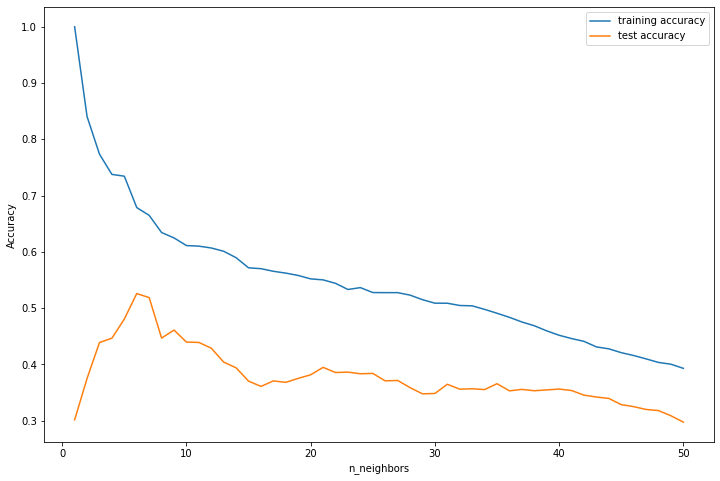

In [33]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [34]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 6


In [35]:
#comparing model results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
*ARD*      {ard_train_score}           {ard_test_score}
""")


#creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


#converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


#sending model results to Excel
model_performance.to_excel('/Users/rahul/Desktop/linear_model_performance_birthweightlow.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6849           0.7134
Lasso      0.6839           0.7209
*ARD*      0.6843           0.7216



In [36]:
#Saving all the birthweight prediction into an excel
prediction_results = pd.DataFrame(data = {
    'Original Sale Prices' : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = '/Users/rahul/Desktop/linear_model_performance_birthweightlow.xlsx',
                            index = False)